# MODELIZACIÓN REGRESION EXPOSURE AT DEFAULT

## IMPORTAR PAQUETES

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split

from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.ensemble import HistGradientBoostingRegressor

from sklearn.pipeline import Pipeline

from sklearn.model_selection import GridSearchCV

from sklearn.metrics import mean_absolute_error

#Autocompletar rápido
%config IPCompleter.greedy=True

#Desactivar la notación científica
pd.options.display.float_format = '{:.2f}'.format

#Desactivar los warnings
import warnings
warnings.filterwarnings("ignore")

## IMPORTAR LOS DATOS

In [2]:
ruta_proyecto = 'C:/Users/mig_g/OneDrive/PROYECTOS_MIGUEL/SCORING_RIESGOS'
ruta_proyecto

'C:/Users/mig_g/OneDrive/PROYECTOS_MIGUEL/SCORING_RIESGOS'

Nombres de los ficheros de datos.

In [3]:
nombre = 'df_tablon_ead.pickle'

Cargar los datos.

In [4]:
df = pd.read_pickle(ruta_proyecto + '/02_Datos/03_Trabajo/' + nombre)

## CREAR X e Y

In [5]:
x = df.drop(columns='target_ead')
y = df.target_ead

## MODELIZAR

### Reservar el dataset de validacion

In [6]:
train_x,val_x,train_y,val_y = train_test_split(x,y,test_size=0.3)

### Crear el pipe y el diccionario de algorimos, parámetros y valores a testar

In [7]:
pipe = Pipeline([('algoritmo',Ridge())])

grid = [      
        {'algoritmo': [Ridge()],
         'algoritmo__alpha': list(np.arange(0.1,1.1,0.1))},
        
        {'algoritmo': [Lasso()],
         'algoritmo__alpha': list(np.arange(0.1,1.1,0.1))},
    
        {'algoritmo': [HistGradientBoostingRegressor(min_samples_leaf = 100, scoring = 'neg_mean_absolute_percentage_error')],
         'algoritmo__learning_rate': [0.01,0.025,0.05,0.1],
         'algoritmo__max_iter': [50,100,200],
         'algoritmo__max_depth': [5,10,20],
         'algoritmo__l2_regularization': [0,0.25,0.5,0.75,1]}
       ]

### Optimizar los hiper parámetros

####  Con grid search

In [8]:
grid_search = GridSearchCV(estimator= pipe, 
                           param_grid = grid, 
                           cv = 3, 
                           scoring = 'neg_mean_absolute_error',
                           verbose = 0,
                           n_jobs = -1)

modelo = grid_search.fit(train_x,train_y)

In [9]:
salida = pd.DataFrame(grid_search.cv_results_).sort_values(by = 'rank_test_score').reset_index(drop=True).head(10)
salida

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_algoritmo,param_algoritmo__alpha,param_algoritmo__l2_regularization,param_algoritmo__learning_rate,param_algoritmo__max_depth,param_algoritmo__max_iter,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,61.48,0.57,1.12,0.04,HistGradientBoostingRegressor(l2_regularizatio...,NaN,0.50,0.10,20,200,{'algoritmo': HistGradientBoostingRegressor(l2...,-0.24,-0.23,-0.24,-0.24,0.00,1
1,57.21,0.71,1.11,0.03,HistGradientBoostingRegressor(l2_regularizatio...,NaN,0.75,0.10,20,200,{'algoritmo': HistGradientBoostingRegressor(l2...,-0.24,-0.24,-0.24,-0.24,0.00,2
2,59.62,1.36,1.11,0.03,HistGradientBoostingRegressor(l2_regularizatio...,NaN,0,0.10,20,200,{'algoritmo': HistGradientBoostingRegressor(l2...,-0.24,-0.23,-0.24,-0.24,0.00,3
3,59.26,0.66,1.12,0.02,HistGradientBoostingRegressor(l2_regularizatio...,NaN,0.50,0.10,10,200,{'algoritmo': HistGradientBoostingRegressor(l2...,-0.24,-0.24,-0.24,-0.24,0.00,4
4,53.49,0.49,1.09,0.02,HistGradientBoostingRegressor(l2_regularizatio...,NaN,0.75,0.10,10,200,{'algoritmo': HistGradientBoostingRegressor(l2...,-0.24,-0.24,-0.24,-0.24,0.00,5
5,57.59,0.81,1.08,0.01,HistGradientBoostingRegressor(l2_regularizatio...,NaN,0,0.10,10,200,{'algoritmo': HistGradientBoostingRegressor(l2...,-0.24,-0.24,-0.24,-0.24,0.00,6
6,45.25,0.18,0.71,0.01,HistGradientBoostingRegressor(l2_regularizatio...,NaN,1,0.10,20,200,{'algoritmo': HistGradientBoostingRegressor(l2...,-0.24,-0.24,-0.24,-0.24,0.00,7
7,51.53,1.17,0.79,0.05,HistGradientBoostingRegressor(l2_regularizatio...,NaN,1,0.10,10,200,{'algoritmo': HistGradientBoostingRegressor(l2...,-0.24,-0.24,-0.24,-0.24,0.00,8
8,63.99,0.96,1.13,0.03,HistGradientBoostingRegressor(l2_regularizatio...,NaN,0.25,0.10,20,200,{'algoritmo': HistGradientBoostingRegressor(l2...,-0.24,-0.24,-0.24,-0.24,0.00,9
9,58.41,0.63,1.09,0.06,HistGradientBoostingRegressor(l2_regularizatio...,NaN,0.25,0.10,10,200,{'algoritmo': HistGradientBoostingRegressor(l2...,-0.24,-0.24,-0.24,-0.24,0.00,10


el resultado es el mismo en todas las primeras configuraciones. Usare la primera configuracion para reentrenar el modelo

In [18]:
modelo.best_params_

{'algoritmo': HistGradientBoostingRegressor(l2_regularization=0.5, max_depth=20, max_iter=200,
                               min_samples_leaf=100,
                               scoring='neg_mean_absolute_percentage_error'),
 'algoritmo__l2_regularization': 0.5,
 'algoritmo__learning_rate': 0.1,
 'algoritmo__max_depth': 20,
 'algoritmo__max_iter': 200}

**OBTENER EL MEJOR MODELO Y SUS PARAMETROS ES LO QUE IMPORTA DE ESTE NOTEBOOK**

In [19]:
modelo_ead = HistGradientBoostingRegressor(learning_rate = 0.1,
                                          max_iter = 200,
                                          max_depth = 20,
                                          min_samples_leaf = 100,
                                          scoring = 'neg_mean_absolute_percentage_error',
                                          l2_regularization = 0.5)
modelo_ead.fit(train_x,train_y)

HistGradientBoostingRegressor(l2_regularization=0.5, max_depth=20, max_iter=200,
                              min_samples_leaf=100,
                              scoring='neg_mean_absolute_percentage_error')

## EVALUAR

### Predecir sobre validación

In [20]:
pred = modelo_ead.predict(val_x)

Corregimos los máximos y mínimos.

In [21]:
pred = np.where(pred < 0, 0, pred)
pred = np.where(pred > 1, 1, pred)

### Evaluar sobre validación

In [22]:
mean_absolute_error(val_y, pred)

0.23564457207818174

## REPORTING DEL MODELO

In [27]:
check_validacion = pd.DataFrame({'ead_real':val_y, 'ead_pred':pred})
check_validacion

,ead_real,ead_pred
id_cliente,,
13647707,0.90,0.07
55068488,0.00,0.41
119386648,0.00,0.35
137234652,0.92,1.00
34332903,0.59,0.13
...,...,...
62255192,0.00,0.10
135126588,0.79,0.44
75330946,0.88,0.30


In [24]:
check_validacion.corr() # 0.64 %

,ead_real,ead_pred
ead_real,1.00,0.63
ead_pred,0.63,1.00


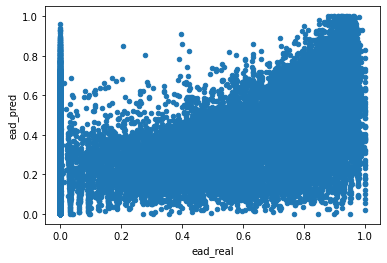

In [25]:
check_validacion.plot.scatter(x='ead_real',y='ead_pred');

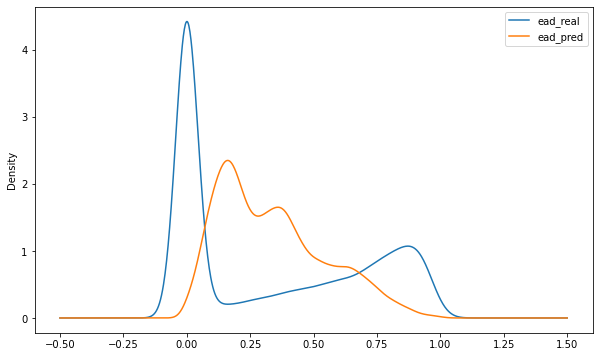

In [26]:
check_validacion.plot.density(figsize = (10,6));